In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
data = pd.read_csv("../cleaned_dataset.csv")

In [3]:
data.shape

(894, 14)

In [4]:
data.head()

,Id,ActivityDate,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [5]:
X = np.log(data.iloc[:,2:-1] + 1e-10) #take log of X; add a small constant to avoid -Inf
y = data.iloc[:,-1]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Total Distance

In [7]:
x1_train = X_train.TotalDistance
x1_train = sm.add_constant(x1_train)
x1_test = X_test.TotalDistance
x1_test = sm.add_constant(x1_test)

In [8]:
# Fit and summarize OLS model
mod = sm.OLS(endog = y_train, exog = x1_train)
res = mod.fit()

y_pred = res.predict(x1_test)
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               Calories   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     67.90
Date:                Fri, 29 Jan 2021   Prob (F-statistic):           8.24e-16
Time:                        10:15:40   Log-Likelihood:                -5684.4
No. Observations:                 715   AIC:                         1.137e+04
Df Residuals:                     713   BIC:                         1.138e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2317.2678     25.848     89.651

[]

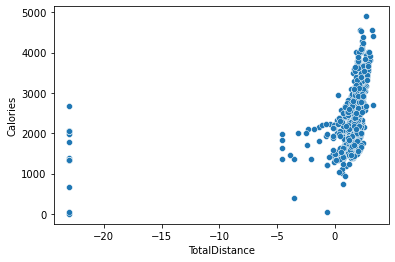

In [9]:
ax = sns.scatterplot(x=x1_train.iloc[:,-1], y=y_train)
ax.set()

In [10]:
print("Train MSE:", mean_squared_error(y_train,res.fittedvalues)) 
print("Train R^2:", res.rsquared)
print("Test MSE:", mean_squared_error(y_test,y_pred)) 
print("Test R^2:", r2_score(y_test,y_pred))

Train MSE: 471029.8256786331
Train R^2: 0.08694865889149739
Test MSE: 442355.7180075439
Test R^2: 0.09492363495265688


## Very Active Minutes

In [11]:
x2_train = X_train.VeryActiveMinutes
x2_train = sm.add_constant(x2_train)
x2_test = X_test.VeryActiveMinutes
x2_test = sm.add_constant(x2_test)

In [12]:
# Fit and summarize OLS model
mod = sm.OLS(endog = y_train, exog = x2_train)
res = mod.fit()

y_pred = res.predict(x2_test)
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               Calories   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     200.6
Date:                Fri, 29 Jan 2021   Prob (F-statistic):           2.61e-40
Time:                        10:15:41   Log-Likelihood:                -5628.3
No. Observations:                 715   AIC:                         1.126e+04
Df Residuals:                     713   BIC:                         1.127e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2525.2796     27.13

[]

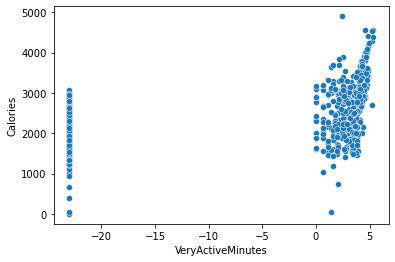

In [13]:
ax = sns.scatterplot(x=x2_train.iloc[:,-1], y=y_train)
ax.set()

In [14]:
print("Train MSE:", mean_squared_error(y_train,res.fittedvalues)) 
print("Train R^2:", res.rsquared)
print("Test MSE:", mean_squared_error(y_test,y_pred)) 
print("Test R^2:", r2_score(y_test,y_pred))

Train MSE: 402604.601091769
Train R^2: 0.2195851495525193
Test MSE: 400140.234040702
Test R^2: 0.18129809609791114


## Total Steps

In [15]:
x3_train = X_train.TotalSteps
x3_train = sm.add_constant(x3_train)
x3_test = X_test.TotalSteps
x3_test = sm.add_constant(x3_test)

In [16]:
# Fit and summarize OLS model
mod = sm.OLS(endog = y_train, exog = x3_train)
res = mod.fit()

y_pred = res.predict(x3_test)
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               Calories   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     53.12
Date:                Fri, 29 Jan 2021   Prob (F-statistic):           8.36e-13
Time:                        10:15:42   Log-Likelihood:                -5691.3
No. Observations:                 715   AIC:                         1.139e+04
Df Residuals:                     713   BIC:                         1.140e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2112.0342     40.621     51.994      0.0

[]

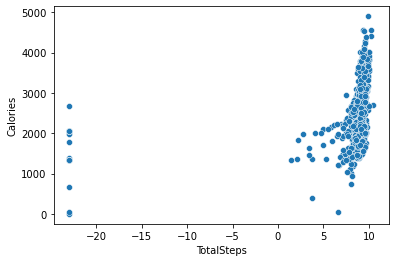

In [17]:
ax = sns.scatterplot(x=x3_train.iloc[:,-1], y=y_train)
ax.set()

In [18]:
print("Train MSE:", mean_squared_error(y_train,res.fittedvalues)) 
print("Train R^2:", res.rsquared)
print("Test MSE:", mean_squared_error(y_test,y_pred)) 
print("Test R^2:", r2_score(y_test,y_pred))

Train MSE: 480117.94246942387
Train R^2: 0.06933211579462029
Test MSE: 451892.5591207168
Test R^2: 0.0754109008850995
